<a href="https://colab.research.google.com/github/alik604/mathematical-finance/blob/master/XEG_ETF_decompotion_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XEG
https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf

### This notebook does not include good predictions. For that refer to code for an LSTM [here](https://github.com/alik604/mathematical-finance)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas_datareader.data as web
import datetime
 
  
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

plt.style.use('fivethirtyeight')  
  
  
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
start = datetime.datetime(2020,3,21)
end = datetime.date.today()

You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Populating the interactive namespace from numpy and matplotlib

You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



# Note
I consider only the top 10 and the ETF itself. Then I ignore the holdings that are <3%, but add `XOM` and `CVX`   
## Let's plot them

In [2]:

symbols = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to'] # ,'PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'
tmp = {
                      symbols[0]: web.DataReader(symbols[0], "yahoo", start, end)["Adj Close"], # XEG
                      symbols[1]: web.DataReader(symbols[1], "yahoo", start, end)["Adj Close"],
                      symbols[2]: web.DataReader(symbols[2], "yahoo", start, end)["Adj Close"],
                      symbols[3]: web.DataReader(symbols[3], "yahoo", start, end)["Adj Close"],
                      symbols[4]: web.DataReader(symbols[4], "yahoo", start, end)["Adj Close"],
                      symbols[5]: web.DataReader(symbols[5], "yahoo", start, end)["Adj Close"],
                      # symbols[6]: web.DataReader(symbols[6], "yahoo", start, end)["Adj Close"],
                      # symbols[7]: web.DataReader(symbols[7], "yahoo", start, end)["Adj Close"],
                      # symbols[8]: web.DataReader(symbols[8], "yahoo", start, end)["Adj Close"],
                      # symbols[9]: web.DataReader(symbols[9], "yahoo", start, end)["Adj Close"],
                      # symbols[10]:web.DataReader(symbols[10],"yahoo", start, end)["Adj Close"], 
                      "XOM": web.DataReader("XOM", "yahoo", start, end)["Adj Close"],
                      "CVX": web.DataReader("CVX", "yahoo", start, end)["Adj Close"],
}

<AxesSubplot:xlabel='Date'>

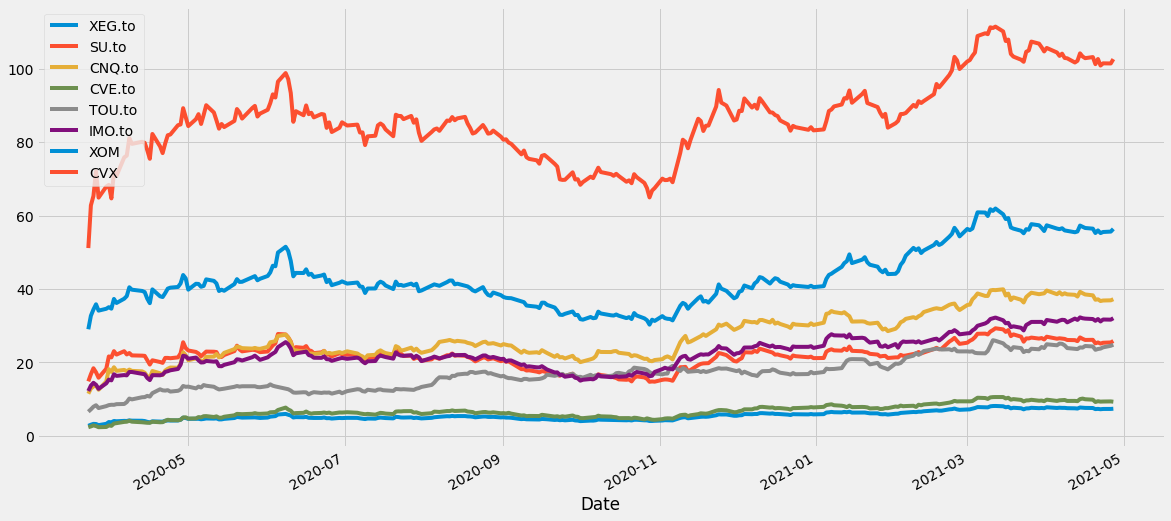

In [3]:
# AAPL = web.DataReader("AAPL", "yahoo", start, end)
# NFLX = web.DataReader("NFLX", "yahoo", start, end)
# GOOG = web.DataReader("GOOG", "yahoo", start, end)
# FB   = web.DataReader("FB", "yahoo", start, end)
# AMZN = web.DataReader("AMZN", "yahoo", start, end)
# BABA = web.DataReader("BABA", "yahoo", start, end)
# BIDU = web.DataReader("BIDU", "yahoo", start, end)
# NVDA = web.DataReader("NVDA", "yahoo", start, end)
# TSLA = web.DataReader("TSLA", "yahoo", start, end)
# TWTR = web.DataReader("TWTR", "yahoo", start, end)

# FNGU = web.DataReader("FNGU", "yahoo", start, end)

# MSFT = web.DataReader("MSFT", "yahoo", start, end)


stocks = pd.DataFrame(tmp)
stocks=stocks.dropna()
stocks.plot(grid=True, figsize=(18,9))

In [4]:
print(f'From {str(stocks.index[0].date())} to {str(stocks.index[-1].date())}')

From 2020-03-23 to 2021-04-27


## let's do stuff to feel smart...

<AxesSubplot:xlabel='Date'>

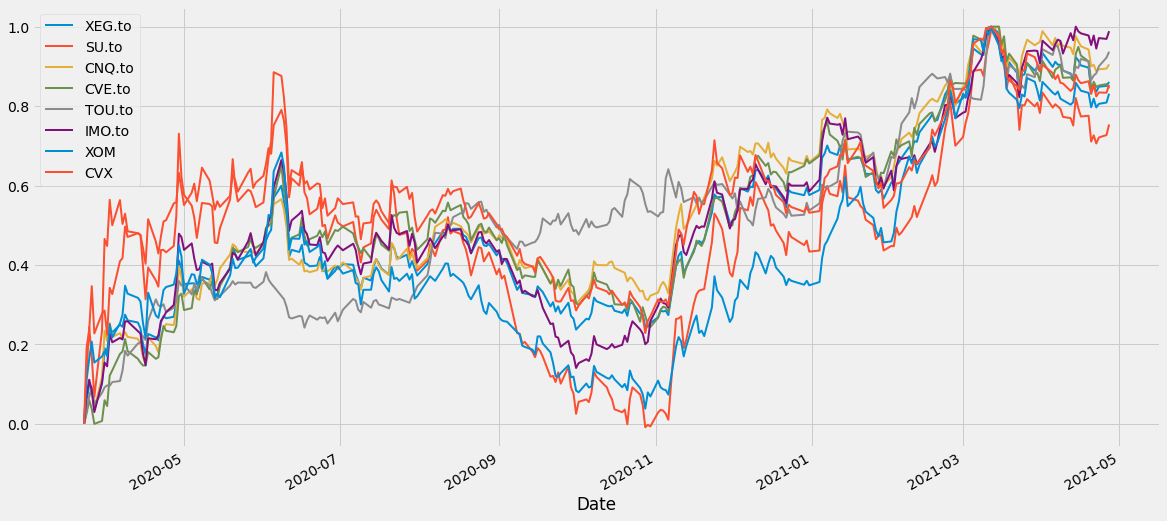

In [5]:
def normIt(myDf):
   return (myDf - myDf.mean()) / (myDf.max() - myDf.min())

stocks_norm = normIt(stocks)
stocks_norm = stocks_norm.dropna()
# for i in stocks_norm:
#   tmp = stocks_norm.loc[:, i]
#   offset = 0 - tmp[0]
#   stocks_norm.loc[:, i] += offset

stocks_norm -= stocks_norm.iloc[0]
stocks_norm.plot(grid=True, linewidth=2, figsize=(18, 9))

<AxesSubplot:title={'center':'XEG.to norm'}, xlabel='Date'>

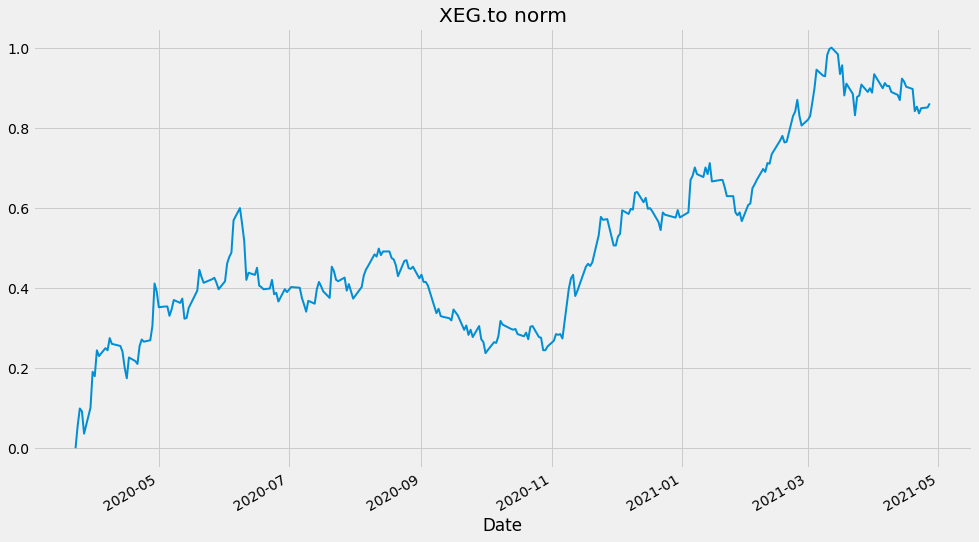

In [6]:
stocks_norm['XEG.to'].plot(grid=True, linewidth=2, title = "XEG.to norm")

In [7]:
stocks_norm.head(1) # yup all zeros

,XEG.to,SU.to,CNQ.to,CVE.to,TOU.to,IMO.to,XOM,CVX
Date,,,,,,,,
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Correlations 

In [8]:
corrwith = stocks_norm.corr()
corrwith

,XEG.to,SU.to,CNQ.to,CVE.to,TOU.to,IMO.to,XOM,CVX
XEG.to,1.000000,0.793901,0.985762,0.982206,0.862788,0.980298,0.920948,0.919245
SU.to,0.793901,1.000000,0.703258,0.749670,0.417709,0.831626,0.912168,0.927165
CNQ.to,0.985762,0.703258,1.000000,0.972308,0.899721,0.957235,0.850896,0.862835
CVE.to,0.982206,0.749670,0.972308,1.000000,0.845705,0.962584,0.884195,0.891786
TOU.to,0.862788,0.417709,0.899721,0.845705,1.000000,0.795306,0.683032,0.663961
IMO.to,0.980298,0.831626,0.957235,0.962584,0.795306,1.000000,0.923250,0.936961
XOM,0.920948,0.912168,0.850896,0.884195,0.683032,0.923250,1.000000,0.955554
CVX,0.919245,0.927165,0.862835,0.891786,0.663961,0.936961,0.955554,1.000000


In [9]:
from scipy.stats import spearmanr

corrwith_spearman = spearmanr(stocks_norm)[0]
corrwith_spearman = pd.DataFrame(corrwith_spearman, index=stocks.columns, columns=stocks.columns)
corrwith_spearman

,XEG.to,SU.to,CNQ.to,CVE.to,TOU.to,IMO.to,XOM,CVX
XEG.to,1.000000,0.757503,0.979541,0.980388,0.777129,0.979549,0.861950,0.898393
SU.to,0.757503,1.000000,0.671848,0.729191,0.360877,0.794235,0.925866,0.911638
CNQ.to,0.979541,0.671848,1.000000,0.959489,0.827482,0.945767,0.781477,0.838007
CVE.to,0.980388,0.729191,0.959489,1.000000,0.744976,0.958101,0.852784,0.866331
TOU.to,0.777129,0.360877,0.827482,0.744976,1.000000,0.730911,0.505077,0.580103
IMO.to,0.979549,0.794235,0.945767,0.958101,0.730911,1.000000,0.885221,0.913728
XOM,0.861950,0.925866,0.781477,0.852784,0.505077,0.885221,1.000000,0.942784
CVX,0.898393,0.911638,0.838007,0.866331,0.580103,0.913728,0.942784,1.000000


In [10]:
# corr_cumSum = corrwith.cumsum()
corr_cumSum = corrwith_spearman.cumsum()
corr_cumSum

,XEG.to,SU.to,CNQ.to,CVE.to,TOU.to,IMO.to,XOM,CVX
XEG.to,1.000000,0.757503,0.979541,0.980388,0.777129,0.979549,0.861950,0.898393
SU.to,1.757503,1.757503,1.651389,1.709579,1.138006,1.773783,1.787816,1.810031
CNQ.to,2.737044,2.429352,2.651389,2.669068,1.965488,2.719551,2.569293,2.648038
CVE.to,3.717432,3.158543,3.610878,3.669068,2.710464,3.677652,3.422077,3.514369
TOU.to,4.494562,3.519420,4.438360,4.414044,3.710464,4.408563,3.927154,4.094473
IMO.to,5.474111,4.313655,5.384127,5.372145,4.441375,5.408563,4.812375,5.008201
XOM,6.336060,5.239521,6.165605,6.224929,4.946452,6.293784,5.812375,5.950985
CVX,7.234454,6.151158,7.003612,7.091260,5.526556,7.207512,6.755159,6.950985


In [11]:
keepThese = corr_cumSum.loc[:, corr_cumSum.iloc[-1] > corr_cumSum.iloc[-1].mean()*1.01]
keepThese

,XEG.to,CNQ.to,CVE.to,IMO.to,CVX
XEG.to,1.000000,0.979541,0.980388,0.979549,0.898393
SU.to,1.757503,1.651389,1.709579,1.773783,1.810031
CNQ.to,2.737044,2.651389,2.669068,2.719551,2.648038
CVE.to,3.717432,3.610878,3.669068,3.677652,3.514369
TOU.to,4.494562,4.438360,4.414044,4.408563,4.094473
IMO.to,5.474111,5.384127,5.372145,5.408563,5.008201
XOM,6.336060,6.165605,6.224929,6.293784,5.950985
CVX,7.234454,7.003612,7.091260,7.207512,6.950985


In [12]:
# keepThese = keepThese.loc[:, keepThese.iloc[-1] > keepThese.iloc[-1].mean()]
# keepThese

In [13]:
dropAllButThese = keepThese.columns.to_list()
corrwith[dropAllButThese]#.cumsum()

,XEG.to,CNQ.to,CVE.to,IMO.to,CVX
XEG.to,1.000000,0.985762,0.982206,0.980298,0.919245
SU.to,0.793901,0.703258,0.749670,0.831626,0.927165
CNQ.to,0.985762,1.000000,0.972308,0.957235,0.862835
CVE.to,0.982206,0.972308,1.000000,0.962584,0.891786
TOU.to,0.862788,0.899721,0.845705,0.795306,0.663961
IMO.to,0.980298,0.957235,0.962584,1.000000,0.936961
XOM,0.920948,0.850896,0.884195,0.923250,0.955554
CVX,0.919245,0.862835,0.891786,0.936961,1.000000


<AxesSubplot:xlabel='Date'>

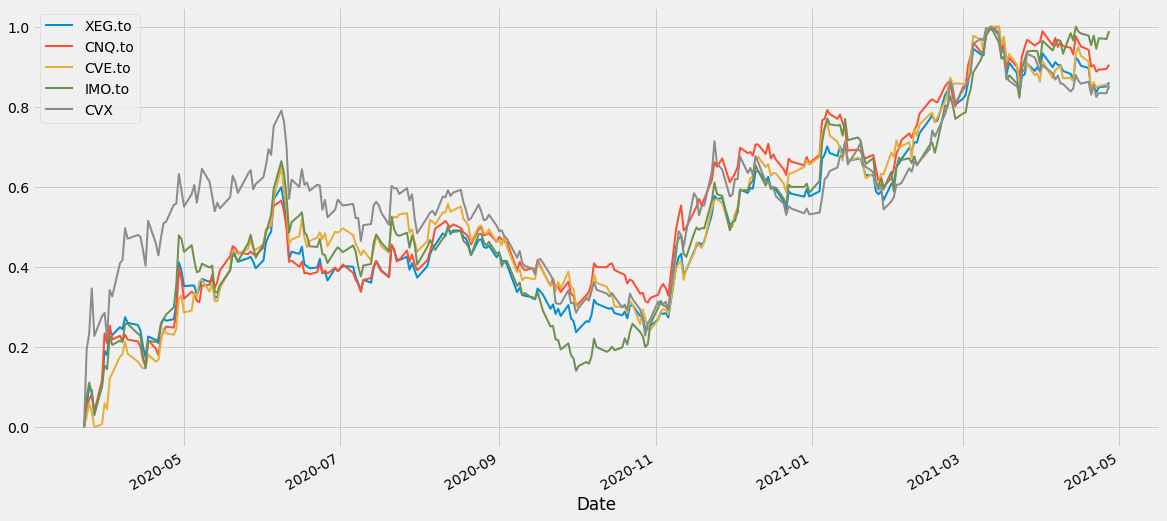

In [14]:
stocks_main_norm = stocks_norm[dropAllButThese]
stocks_main_norm.plot(grid=True, linewidth=2, figsize=(18, 9))

#  Better Prediction
(compared to end of notebook)

.. better to use a LTSM, this still sucks. maybe one day I'll fix this, or perhaps till will be fixed but in another notebook. Who knows 

In [15]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import BayesianRidge

from fbprophet import Prophet
from sklearn.svm import SVR 
import xgboost

In [16]:
# help(xgboost.XGBRegressor)

## XGBRegressor seems to do only 1D, so i dont recommend it...

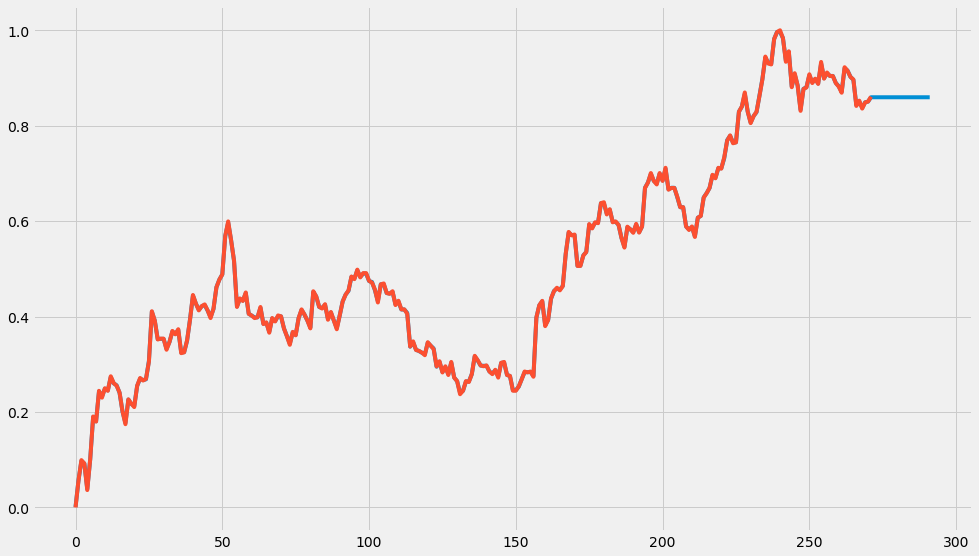

In [17]:
df = stocks_main_norm
x = np.arange(df.shape[0]).reshape(-1, 1)
x_pred = np.arange(df.shape[0], df.shape[0]+10).reshape(-1, 1)
y = df["XEG.to"].values # df.values

# low learning_rate is bad. low-med max_depth is fine (10ish), n_estimators=50 is fine. 
xg_reg = xgboost.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.5, max_depth = 100, n_estimators = 500)


_ = xg_reg.fit(x,y)
y_pred = xg_reg.predict(np.array(range(0, df.shape[0]+20)))

plt.plot(y_pred)
plt.plot(x, y)


## These to multidimensional regression, i recommend these

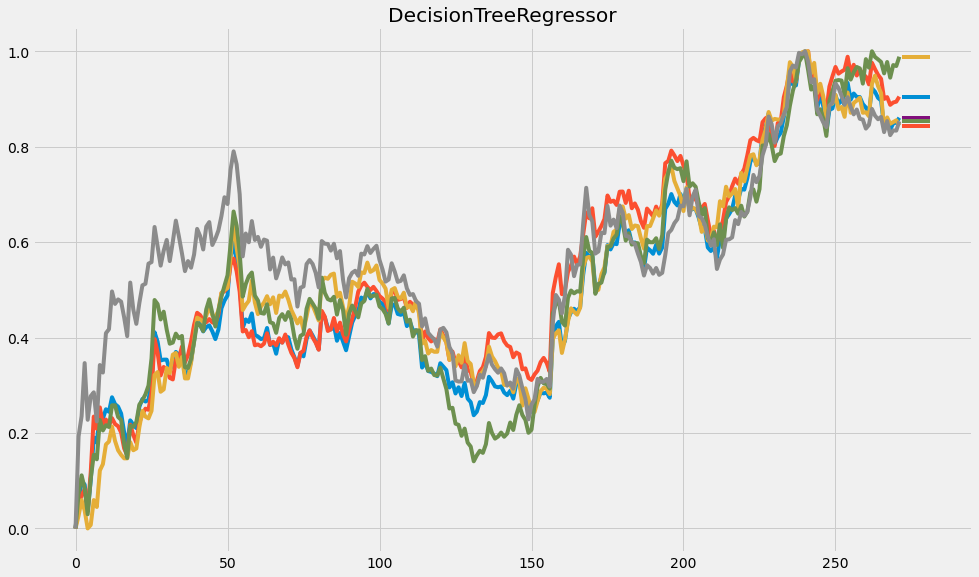

Do only XEG.to


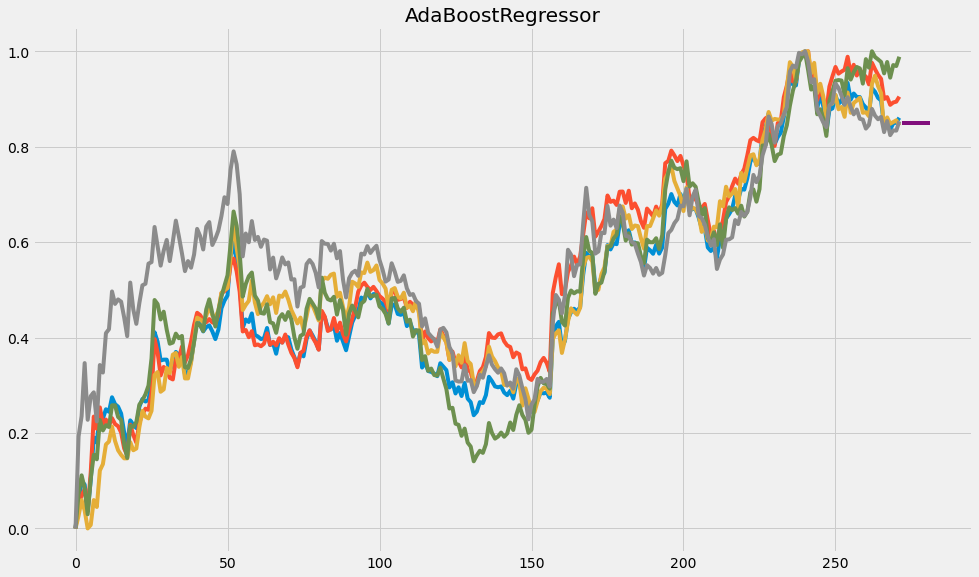

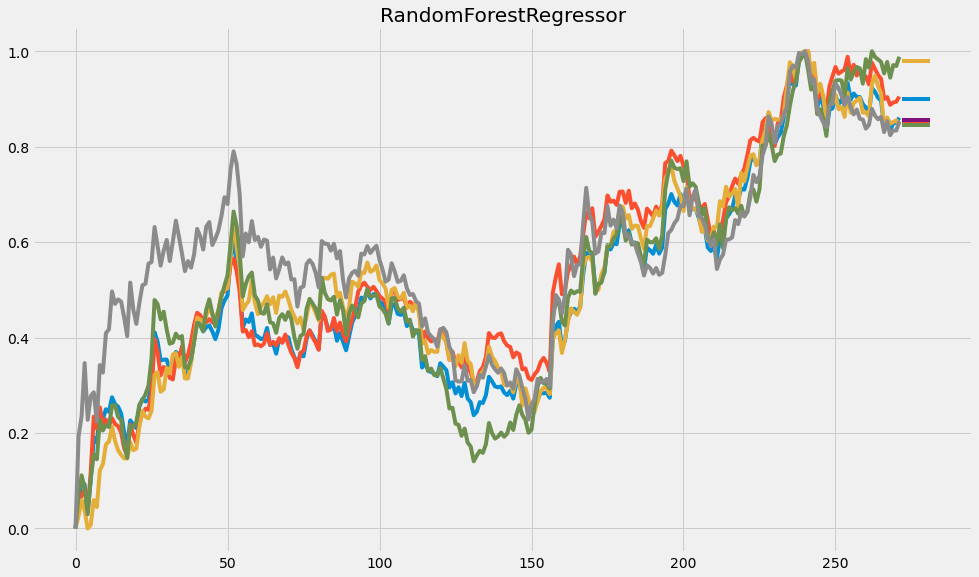

Do only XEG.to


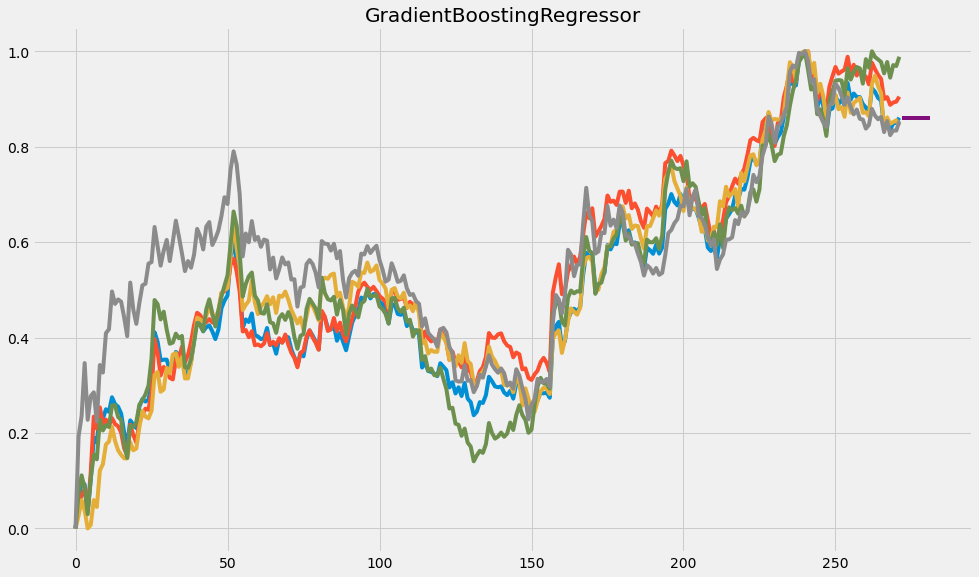

Do only XEG.to


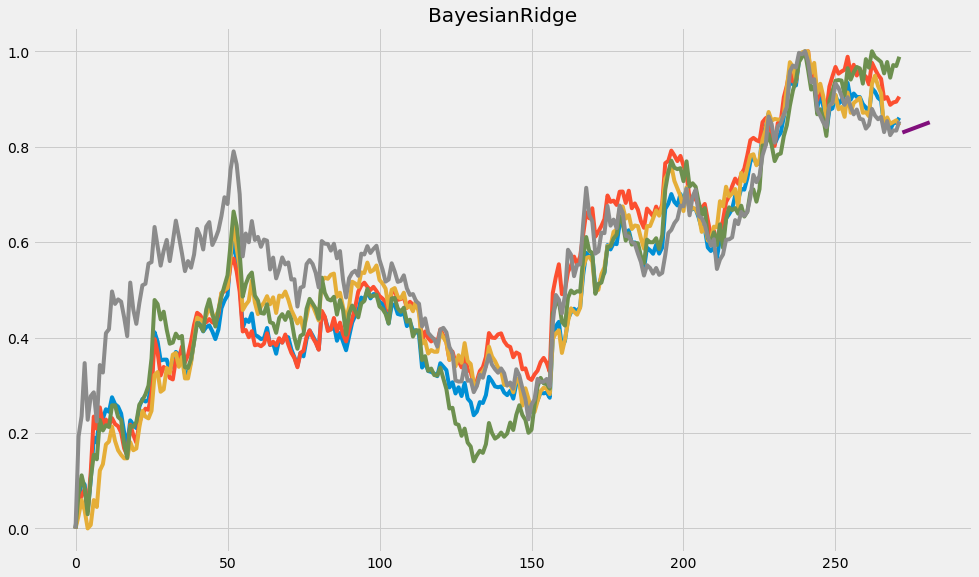

In [25]:
x = np.arange(df.shape[0]).reshape(-1, 1)
x_pred = np.arange(df.shape[0], df.shape[0]+10).reshape(-1, 1)

y = df.values
# y = df["XEG.to"].values 

regs = [DecisionTreeRegressor(),
        AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), loss='square'),
        RandomForestRegressor(200),
        GradientBoostingRegressor(n_estimators=150, max_depth=5),
        BayesianRidge(n_iter=500, tol=0.0015, normalize=True)]
for reg in regs:
  try:
    _ = reg.fit(x, y)
  except:
    print(f'Do only {"XEG.to"}')
    _ = reg.fit(x, stocks_main_norm["XEG.to"].values)

  
  y_pred = reg.predict(x_pred)

  _ = plt.plot(x, y)
  _ = plt.plot(x_pred, y_pred)
  _ = plt.title(str(type(reg)).split(".")[-1][:-2])
  plt.show()

In [19]:
# svr_rbf = SVR(kernel='rbf')
# svr_rbf.fit(x, y)

# plt.scatter(dates, prices, c='k', label='Data')
# plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
# plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
# plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')

# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('Support Vector Regression')
# plt.legend()
# plt.show()

# Prediction



In [20]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

model = ARIMA(quickDF["XEG.to"], order=(5,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


NameError: name 'quickDF' is not defined

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["XEG.to"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["XEG.to"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

In [ ]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


In [ ]:
from matplotlib.dates import DateFormatter, WeekdayLocator,    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = web.DataReader("FNGU", "yahoo", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 